In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import json

In [3]:
ams = json.loads(open("amsterdam.json").read())
ams = DataFrame(ams)

In [4]:
pd.set_option('display.max_columns', 500)

In [6]:
ams.head(25)

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,$145.00,52.361173,4.866755,Entire home/apt,f
1,1.0,2,1.0,1.0,1,2,17,1,$88.00,52.370237,4.859507,Entire home/apt,f
10,1.0,2,1.0,1.0,1,3,0,1,$130.00,52.371424,4.848644,Entire home/apt,f
100,1.0,5,1.0,4.0,1,5,2,1,$90.00,52.312889,4.980151,Entire home/apt,f
1000,1.0,1,1.0,1.0,1,1,32,1,$39.00,52.395334,4.916701,Private room,t
10000,1.0,3,1.0,2.0,1,2,3,1,$118.00,52.347202,4.846432,Entire home/apt,f
10001,34.0,4,1.0,2.0,1,2,5,31,$129.00,52.344071,4.868194,Entire home/apt,t
10002,1.0,4,1.0,3.0,1,2,10,1,$130.00,52.345653,4.869328,Entire home/apt,t
10003,1.0,4,1.0,1.0,1,3,16,1,$135.00,52.347393,4.875956,Private room,f
10004,1.0,2,1.0,1.0,1,1,0,1,$94.00,52.350096,4.849824,Entire home/apt,f


In [ ]:
print(ams)

In [3]:
ams.columns

Index(['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'guests_included', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'price', 'latitude', 'longitude',
       'room_type', 'instant_bookable'],
      dtype='object')

In [4]:
ams.dtypes

host_listings_count               float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
guests_included                     int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
price                              object
latitude                          float64
longitude                         float64
room_type                          object
instant_bookable                   object
dtype: object

In [5]:
ams.isnull().sum()

host_listings_count                3
accommodates                       0
bathrooms                         18
bedrooms                          12
guests_included                    0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
price                              0
latitude                           0
longitude                          0
room_type                          0
instant_bookable                   0
dtype: int64

In [6]:
ams['price'] = ams['price'].str.replace("$", "")
print(ams.head())

      host_listings_count  accommodates  bathrooms  bedrooms  guests_included  \
0                     1.0             6        1.0       2.0                1   
1                     1.0             2        1.0       1.0                1   
10                    1.0             2        1.0       1.0                1   
100                   1.0             5        1.0       4.0                1   
1000                  1.0             1        1.0       1.0                1   

      minimum_nights  number_of_reviews  calculated_host_listings_count  \
0                  3                  4                               1   
1                  2                 17                               1   
10                 3                  0                               1   
100                5                  2                               1   
1000               1                 32                               1   

       price   latitude  longitude        room_type instant_bo

In [7]:
ams['price'] = pd.to_numeric(ams['price'], errors='coerce')

In [8]:
ams.dtypes

host_listings_count               float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
guests_included                     int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
price                             float64
latitude                          float64
longitude                         float64
room_type                          object
instant_bookable                   object
dtype: object

In [9]:
round(ams['price'].mean(),3)

133.994

In [10]:
round(ams['price'].max(), 1)

999.0

In [11]:
round(ams['price'].quantile(.99), 1)

425.0

In [12]:
ams = ams.query("price <= 440")
ams.shape

(15031, 13)

In [13]:
ams['price'].quantile(.90)

210.0

In [14]:
ams = ams.dropna()

In [15]:
ams.shape

(14998, 13)

In [16]:
ams.isnull().sum()

host_listings_count               0
accommodates                      0
bathrooms                         0
bedrooms                          0
guests_included                   0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
price                             0
latitude                          0
longitude                         0
room_type                         0
instant_bookable                  0
dtype: int64

In [17]:
import math
from math import radians, cos, sin, asin, sqrt

In [18]:
ams["d_centre"] = 0.0
ams.shape

(14998, 14)

In [19]:
def haversine(lon1, lat1):
    lon2 = 4.899431
    lat2 = 52.379189
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

In [20]:
for index, row in ams.iterrows():
    ams.loc[index, 'd_centre'] = haversine(row['longitude'], row['latitude'])

In [21]:
ams.sort_values("d_centre", ascending = True).head(7)

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable,d_centre
3158,1.0,2,1.5,1.0,1,1,0,1,85.0,52.378546,4.900775,Private room,f,0.115801
3168,1.0,4,1.0,1.0,1,1,0,1,41.0,52.378850,4.901433,Shared room,f,0.140946
2639,1.0,4,1.0,1.0,2,3,27,1,159.0,52.379089,4.897293,Entire home/apt,f,0.145468
3010,4.0,2,1.0,1.0,1,1,4,4,150.0,52.378549,4.896679,Private room,t,0.199767
1860,1.0,2,1.0,1.0,1,1,9,1,120.0,52.378398,4.896674,Private room,f,0.206638
1447,4.0,2,1.0,1.0,1,1,0,4,250.0,52.377927,4.897073,Private room,f,0.212781
3064,2.0,2,1.0,1.0,1,2,21,1,150.0,52.378273,4.896626,Entire home/apt,t,0.215779


In [22]:
ams.query('room_type == "Private room" & d_centre <= 1').agg({'price': np.mean}).round(1)

price    118.1
dtype: float64

In [23]:
x = ams.drop("price", axis = 1)

In [24]:
x.isnull().sum()

host_listings_count               0
accommodates                      0
bathrooms                         0
bedrooms                          0
guests_included                   0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
latitude                          0
longitude                         0
room_type                         0
instant_bookable                  0
d_centre                          0
dtype: int64

In [25]:
x = pd.get_dummies(x)

In [26]:
x.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,latitude,longitude,d_centre,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t
0,1.0,6,1.0,2.0,1,3,4,1,52.361173,4.866755,2.987199,1,0,0,1,0
1,1.0,2,1.0,1.0,1,2,17,1,52.370237,4.859507,2.885443,1,0,0,1,0
10,1.0,2,1.0,1.0,1,3,0,1,52.371424,4.848644,3.551815,1,0,0,1,0
100,1.0,5,1.0,4.0,1,5,2,1,52.312889,4.980151,9.181975,1,0,0,1,0
1000,1.0,1,1.0,1.0,1,1,32,1,52.395334,4.916701,2.142603,0,1,0,0,1


In [27]:
y = ams['price']

In [28]:
import sklearn.model_selection as model_selection

In [29]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.3, random_state = 200)

In [30]:
var = x_train.agg({"accommodates": np.mean}) - x_test.agg({"accommodates": np.mean})
print(round(var, 3))

accommodates    0.045
dtype: float64


In [31]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [32]:
reg = RandomForestRegressor(n_estimators = 100, max_depth = 5, max_features = 'sqrt', oob_score = True)

In [33]:
reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [34]:
reg.score(x_test, y_test)

0.4823335199906741

In [35]:
reg.oob_score_

0.48719564030048035

In [36]:
from sklearn import metrics

In [37]:
metrics.mean_squared_error(y_test, reg.predict(x_test))

2117.814882928803

In [38]:
for i in range(30, 600, 10):
    reg = RandomForestRegressor(n_estimators = i, max_depth = 5, max_features = 'sqrt', oob_score = True)
    reg.fit(x_train, y_train)
    oob = reg.oob_score_
    print("For n estimators = "+ str(i))
    print("OOB Score is: "+ str(oob))
    print("*************************")

For n estimators = 30
OOB Score is: 0.4758601504653678
*************************
For n estimators = 40
OOB Score is: 0.479104611572129
*************************
For n estimators = 50
OOB Score is: 0.4788592831852212
*************************
For n estimators = 60
OOB Score is: 0.48111795188123807
*************************
For n estimators = 70
OOB Score is: 0.4806327009372088
*************************
For n estimators = 80
OOB Score is: 0.4844161318894268
*************************
For n estimators = 90
OOB Score is: 0.48472926837561614
*************************
For n estimators = 100
OOB Score is: 0.481446558097515
*************************
For n estimators = 110
OOB Score is: 0.4832045651202006
*************************
For n estimators = 120
OOB Score is: 0.4833253026713308
*************************
For n estimators = 130
OOB Score is: 0.4811632316426212
*************************
For n estimators = 140
OOB Score is: 0.48237674289400756
*************************
For n estimators = 150

In [39]:
reg = RandomForestRegressor(n_estimators = 530, max_depth = 5, max_features = 'sqrt', oob_score = True)
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

0.48120687830358144

In [40]:
reg.oob_score_

0.4851073913607781

In [41]:
reg.feature_importances_

array([7.90843240e-03, 3.13530028e-01, 6.75962625e-02, 2.39583967e-01,
       7.77401289e-02, 4.63294396e-03, 3.71804711e-03, 1.30550220e-02,
       1.57110644e-02, 3.36263905e-02, 6.04857866e-02, 9.79693916e-02,
       6.34377803e-02, 2.25181475e-04, 4.83258078e-04, 2.96314856e-04])

In [42]:
imp = pd.Series(reg.feature_importances_, index = x.columns.tolist())

In [43]:
imp.sort_values(ascending = False)

accommodates                      0.313530
bedrooms                          0.239584
room_type_Entire home/apt         0.097969
guests_included                   0.077740
bathrooms                         0.067596
room_type_Private room            0.063438
d_centre                          0.060486
longitude                         0.033626
latitude                          0.015711
calculated_host_listings_count    0.013055
host_listings_count               0.007908
minimum_nights                    0.004633
number_of_reviews                 0.003718
instant_bookable_f                0.000483
instant_bookable_t                0.000296
room_type_Shared room             0.000225
dtype: float64

In [44]:
%matplotlib inline

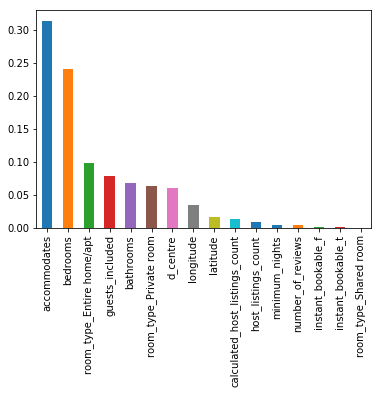

In [45]:
imp.sort_values(ascending = False).plot(kind = "bar")